In [62]:
import pandas as pd
import pandas.api.types as ptypes
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

In [2]:
df.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Every participant record has a vehicle ID
if 'Vehicle ID' not in df.columns:
    print("Vehicle ID doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 3:
        vehicleID = row['Vehicle ID']
        assert pd.isna(vehicleID) is False, "Index {} is has an invalid vehicle ID".format(index)

In [17]:
# Every record have a crash ID
if 'Crash ID' not in df.columns:
    print("Crash ID doesn't exist in table!")
    
for index, row in df.iterrows():
    crashID = row['Crash ID']
    assert pd.isna(crashID) is False, "Index {} is missing crash ID".format(index)

In [18]:
# Every vehicle record has a vehicle ID
if 'Vehicle ID' not in df.columns:
    print("Vehicle ID doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 2:
        vehicleID = row['Vehicle ID']
        assert pd.isna(vehicleID) is False, "Index {} is has an invalid vehicle ID".format(index)

In [20]:
# Every participant record has a participant ID
if 'Participant ID' not in df.columns:
    print("Participant ID doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 3:
        participantID = row['Participant ID']
        assert pd.isna(participantID) is False, "Index {} is has an invalid participant ID".format(index)

In [24]:
# The crash day should be a value between 1 and 31 inclusive.
if 'Crash Day' not in df.columns:
    print("Crash Day doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        crashDay = row['Crash Day']
        assert pd.isna(crashDay) is False and crashDay >= 1 and crashDay <= 31, "Index {} is has an invalid crash day".format(index)

In [36]:
# The crash month should be a value between 1 and 12 inclusive.

if 'Crash Month' not in df.columns:
    print("Crash Month doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        crashMonth = row['Crash Month']
        assert pd.isna(crashMonth) is False and (crashMonth >= 0 and crashMonth <= 12), "Index {} is has an invalid crash month".format(index)

In [37]:
# Crash hour must have code between 00 and 24 or 99.
if 'Crash Hour' not in df.columns:
    print("Crash Hour doesn't exist in table!")
    
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        crashHour = row['Crash Hour']
        assert pd.isna(crashHour) is False and (crashHour >= 0 and crashHour <= 24) or crashHour == 99, "Index {} is has an invalid crash hour".format(index)

In [46]:
# Combination of month, day and year must represent a valid date

for index, row in df.iterrows():
    if row['Record Type'] == 1:
        try:
            newDate = datetime.datetime(int(row['Crash Year']), int(row['Crash Month']), int(row['Crash Day']))
        except ValueError:
            print("Index {} has an invalid date".format(index))

In [ ]:
# Vehicle occupant count = safety equipment used quantity + safety equipment unused quantity + safety equipment use unknown quantity 


In [ ]:
# Total persons involved count = total non-fatal injury count - total fatality count


In [ ]:
# Total vehicle count = total number of vehicle records for this crash.


In [ ]:
# Total minor injury count = total number of participant records with injury severity value 4 

In [53]:
# Every crash has a unique Crash ID
crashIDMap = {}

for index, row in df.iterrows():
    if row['Record Type'] == 1:
        crashID = row['Crash ID']
        if crashID in crashIDMap:
            print("Index {} has a duplicate crash ID".format(index))
        else:
            crashIDMap[crashID] = True

In [54]:
# Every crash has a unique Vehicle ID
vehicleIDMap = {}

for index, row in df.iterrows():
    if row['Record Type'] == 2:
        vehicleID = row['Vehicle ID']
        if vehicleID in vehicleIDMap:
            print("Index {} has a duplicate vehicle ID".format(index))
        else:
            vehicleIDMap[vehicleID] = True

In [58]:
# Every crash participant has a Vehicle ID of a known Vehicle

for index, row in df.iterrows():
    if row['Record Type'] == 3:
        vehicleID = row['Vehicle ID']
        if vehicleID not in vehicleIDMap:
            print("Index {}, Participant ID {} has an unknown vehicle ID".format(index, row['Participant ID']))

Index 8, Participant ID 3888074.0 has an unknown vehicle ID
Index 15, Participant ID 3890873.0 has an unknown vehicle ID
Index 60, Participant ID 3917895.0 has an unknown vehicle ID
Index 61, Participant ID 3917896.0 has an unknown vehicle ID
Index 62, Participant ID 3917897.0 has an unknown vehicle ID
Index 92, Participant ID 3920554.0 has an unknown vehicle ID
Index 272, Participant ID 3934436.0 has an unknown vehicle ID
Index 587, Participant ID 3948382.0 has an unknown vehicle ID
Index 667, Participant ID 3950096.0 has an unknown vehicle ID
Index 668, Participant ID 3950097.0 has an unknown vehicle ID
Index 704, Participant ID 3950705.0 has an unknown vehicle ID
Index 818, Participant ID 3952798.0 has an unknown vehicle ID
Index 819, Participant ID 3952799.0 has an unknown vehicle ID
Index 951, Participant ID 3956990.0 has an unknown vehicle ID
Index 1367, Participant ID 3964941.0 has an unknown vehicle ID
Index 1827, Participant ID 3973419.0 has an unknown vehicle ID
Index 1933, P

In [65]:
# Every crash vehicle has a Crash ID of a known crash

for index, row in df.iterrows():
    if row['Record Type'] == 2:
        crashID = row['Crash ID']
        if crashID not in crashIDMap:
            print("Index {}, Vehicle ID {} has an unknown crash ID".format(index, row['Crash ID']))

In [76]:
crashDay = []
crashMonth = []
crashAge = []
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        crashDay.append(row['Crash Day'])
        crashMonth.append(row['Crash Month'])
    if row['Record Type'] == 3:
        crashAge.append(row['Age'])
    
print(crashAge)

[6.0, 2.0, 2.0, nan, 2.0, 2.0, nan, 9.0, 2.0, 2.0, 9.0, 9.0, 2.0, 9.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, nan, nan, nan, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, nan, 9.0, 2.0, 2.0, 6.0, 9.0, 2.0, 9.0, 9.0, 2.0, 6.0, 2.0, 2.0, 9.0, 2.0, 9.0, 2.0, 2.0, 9.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 9.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, nan, 2.0, 2.0, 2.0, 9.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 9.0, 2.0, 9.0, 2.0, 2.0, 2.0, 9.0, 2.0, 0.0, 0.0, 2.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 2.0, 2.0, 2.0, 9.0, 9.0, 9.0, 2.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 2.0, 9.0, 2.0, 9.0, 9.0, 9.0, 2.0, 2.0,

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


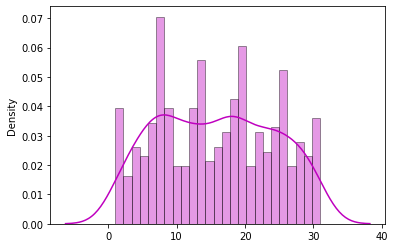

In [80]:
# Crashes are evenly distributed throughout the day

x = crashDay
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


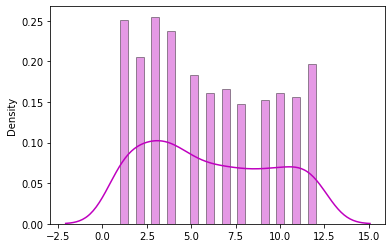

In [74]:
# Crashes are evenly distributed throughout the month

x = crashMonth
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


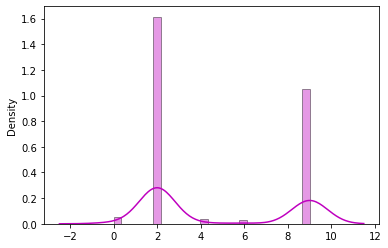

In [75]:
# Crashes are normally distributed over the range of ages.

x = crashAge
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()